# Hotel Development in Philadelphia

Import Panda and Numpy

In [1]:
import types
import pandas as pd
import numpy as np

# Geographic coordinates of districts

Download the geojson file which contains geometric information of the police districts in Philadelphia.

In [2]:
!wget --quiet  http://data.phl.opendata.arcgis.com/datasets/62ec63afb8824a15953399b1fa819df2_0.geojson -O philly.json
philly_geo = r'philly.json' # geojson file
philly_geo

'philly.json'

In [3]:
import json # library to handle JSON files
#import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe



In [4]:
#Open the geojson file and create a dataframe using the 'features'

with open('philly.json') as json_data:
 philly_data = json.load(json_data)
districts_data = philly_data['features']

#Let's look at the first entry.
districts_data[0]

{'type': 'Feature',
 'properties': {'OBJECTID': 321,
  'AREA': None,
  'PERIMETER': 81903.64182498,
  'DISTRICT_': 1,
  'DISTRICT_ID': None,
  'DIST_NUM': 1,
  'SUM_AREA': None,
  'DIST_NUMC': '01',
  'LOCATION': '24th St. & Wolf St.',
  'PHONE': '686-3010',
  'DIV_CODE': 'SPD',
  'AREA_SQMI': 216350124.152872},
 'geometry': {'type': 'Polygon',
  'coordinates': [[[-75.1972400674602, 39.9294369069777],
    [-75.1969266694466, 39.9291830093794],
    [-75.1966551958808, 39.9293313020346],
    [-75.1962094965133, 39.9295635898883],
    [-75.1961188904874, 39.9296108123323],
    [-75.1958479138655, 39.9297493590078],
    [-75.1957372206723, 39.9298059547533],
    [-75.1955869800455, 39.9298908921467],
    [-75.1951072832035, 39.9301552270166],
    [-75.194248043392, 39.9306159338505],
    [-75.1937839896963, 39.9308631513488],
    [-75.1933841649212, 39.9310979226228],
    [-75.19335664475, 39.9312028749596],
    [-75.1928204878523, 39.9311336771483],
    [-75.1923270952234, 39.931071724057

In [5]:
# define the dataframe columns
column_names = ['district','Latitude', 'Longitude'] 

# instantiate the dataframe
districts = pd.DataFrame(columns=column_names)

In [6]:
districts

,district,Latitude,Longitude


In [7]:
#Assign longitude/lattitude values.  I select the first coordinate of the given coordinates in the region.
for data in districts_data:
     
    district_name = data['properties']['DIST_NUM']
        
    district_latlonMatrix = data['geometry']['coordinates']
    district_latlon = district_latlonMatrix[0][0]
    district_lon = district_latlon[0]
    district_lat=district_latlon[1]
    
    districts= districts.append({        'district': district_name,
                                          'Latitude': district_lat,
                                          'Longitude': district_lon}, ignore_index=True)
    
   

In [8]:
districts.head()

,district,Latitude,Longitude
0,1.0,39.929437,-75.197240
1,2.0,40.044541,-75.054444
2,3.0,39.899322,-75.132053
3,5.0,40.034678,-75.204300
4,6.0,39.952940,-75.134366


In [9]:
#Check the types of data
districts.dtypes

district     float64
Latitude     float64
Longitude    float64
dtype: object

In [10]:
#Change data type of district to integer and then check it.
districts.district= districts.district.astype(int)

In [11]:
districts.dtypes

district       int64
Latitude     float64
Longitude    float64
dtype: object

In [12]:
districts.head()

,district,Latitude,Longitude
0,1,39.929437,-75.197240
1,2,40.044541,-75.054444
2,3,39.899322,-75.132053
3,5,40.034678,-75.204300
4,6,39.952940,-75.134366


# Crime Data

I downloaded the crime incidents file of Philadelphia in 2019 from https://www.opendataphilly.org/ and created a dataframe.

In [13]:
# The code was removed by Watson Studio for sharing.

,objectid,dc_dist,psa,dispatch_date_time,dispatch_date,dispatch_time,hour_,dc_key,location_block,ucr_general,text_general_code,point_x,point_y,lat,lng
0,120,9,1,2019-11-12 09:59:00,2019-11-12,09:59:00,9.0,201909047628,100 BLOCK S BROAD ST,600,Thefts,-75.066628,40.049264,40.049264,-75.066628
1,128,9,2,2019-01-19 17:20:00,2019-01-19,17:20:00,17.0,201909002506,1400 BLOCK SPRING GARDEN ST,600,Thefts,-75.161446,39.962334,39.962334,-75.161446
2,53,77,A,2019-12-14 08:07:00,2019-12-14,08:07:00,8.0,201977007047,0 BLOCK PIA WAY,600,Thefts,-75.230706,39.883881,39.883881,-75.230706
3,54,77,A,2019-12-24 14:03:00,2019-12-24,14:03:00,14.0,201977007242,0 BLOCK PIA WAY,600,Thefts,-75.230706,39.883881,39.883881,-75.230706
4,55,77,A,2019-12-25 16:29:00,2019-12-25,16:29:00,16.0,201977007257,0 BLOCK PIA WAY,600,Thefts,-75.230706,39.883881,39.883881,-75.230706


In [14]:
#drop all the columns except dc_district.  I will only need the count of the crimes per district.
df=df_data_1.drop(['objectid', 'dispatch_date_time','dispatch_date','dispatch_time','hour_','ucr_general','dc_key','psa','location_block','text_general_code','point_x','point_y','lat','lng'], axis=1)

In [15]:
#Rename the district id.
df=df.rename(columns={'dc_dist':'district'})
df.head()

,district
0,9
1,9
2,77
3,77
4,77


In [16]:
df.shape

(161087, 1)

In [17]:
#create a new column for the count
df['CrimeCount']=''

In [18]:
#Form a new database with district number and crime count
df1=df.groupby('district').agg({'CrimeCount':'size'}).reset_index()
print(df1)

    district  CrimeCount
0          1        2560
1          2        6611
2          3        7160
3          5        2260
4          6        8482
5          7        2497
6          8        4312
7          9        7799
8         12        8369
9         14        8626
10        15       10981
11        16        6765
12        17        4650
13        18        9107
14        19       10745
15        22       10932
16        24       13546
17        25        9510
18        26        5699
19        35       10797
20        39        9013
21        77         666


In [19]:
# Matplotlib and associated plotting modules
%matplotlib inline 
import matplotlib.cm as cm
import matplotlib.colors as colors


import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot') # optional: for ggplot-like style

In [20]:
# Reindex the data frame with "district"
df1.set_index('district',inplace=True)

Draw a bar chart which gives crime numbers per district.

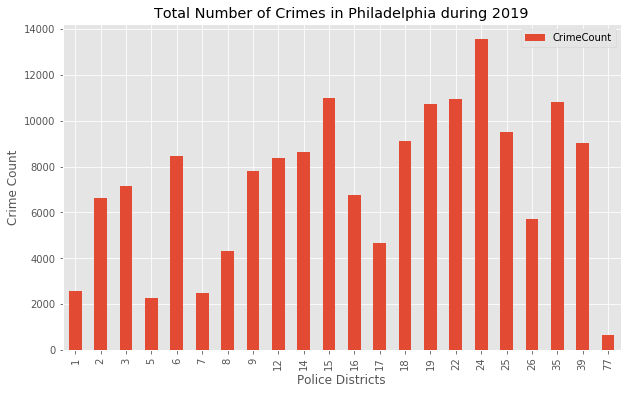

In [21]:
df1.plot(kind='bar', figsize=(10, 6))

plt.xlabel('Police Districts') # add to x-label to the plot
plt.ylabel('Crime Count') # add y-label to the plot
plt.title('Total Number of Crimes in Philadelphia during 2019') # add title to the plot

plt.show()

Merge the crime data above with the dataframe obtained from the geojson file to get the longitudes/latitudes.

In [22]:
#df_geo['PostalCode']=df_geo['PostalCode'].str.strip()
df_districts= pd.merge(df1,districts,on="district", how='left')

df_districts.head()

,district,CrimeCount,Latitude,Longitude
0,1,2560,39.929437,-75.197240
1,2,6611,40.044541,-75.054444
2,3,7160,39.899322,-75.132053
3,5,2260,40.034678,-75.204300
4,6,8482,39.952940,-75.134366


In [23]:

df_districts

,district,CrimeCount,Latitude,Longitude
0,1,2560,39.929437,-75.197240
1,2,6611,40.044541,-75.054444
2,3,7160,39.899322,-75.132053
3,5,2260,40.034678,-75.204300
4,6,8482,39.952940,-75.134366
5,7,2497,40.128214,-74.998538
6,8,4312,40.120206,-74.975675
7,9,7799,39.953393,-75.163665
8,12,8369,39.947855,-75.220886
9,14,8626,40.074132,-75.190836


Install geopy to get the longitude/latitude coordinates for Philadelphia.

In [24]:
!conda install -c conda-forge geopy --yes
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values



Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    python_abi-3.6             |          1_cp36m           4 KB  conda-forge
    ca-certificates-2020.6.20  |       hecda079_0         145 KB  conda-forge
    certifi-2020.6.20          |   py36h9f0ad1d_0         151 KB  conda-forge
    openssl-1.1.1g             |       h516909a_0         2.1 MB  conda-forge
    geopy-2.0.0                |     pyh9f0ad1d_0          63 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         2.5 MB

The following NEW packages will be INSTALLED:

    geographiclib:   1.50-py_0          conda-forge
    geopy:           

Install folium for maps

In [25]:
!conda install -c conda-forge folium=0.5.0 --yes 
import folium # map rendering library


Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - folium=0.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    altair-4.1.0               |             py_1         614 KB  conda-forge
    folium-0.5.0               |             py_0          45 KB  conda-forge
    vincent-0.4.4              |             py_1          28 KB  conda-forge
    branca-0.4.1               |             py_0          26 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         713 KB

The following NEW packages will be INSTALLED:

    altair:  4.1.0-py_1 conda-forge
    branca:  0.4.1-py_0 conda-forge
    folium:  0.5.0-py_0 conda-forge
    vincent: 0.4.4-py_1 conda-forge


altair-4.1.0         | 614 KB    | ##################################### | 1

In [26]:
#get the coordinates of Philadelphia using geopy.
address='Philadelphia, PA'

geolocator = Nominatim(user_agent="Philly_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinates of Philadelphia are {}, {}.'.format(latitude, longitude))

The geograpical coordinates of Philadelphia are 39.9527237, -75.1635262.


In [27]:
# create map of Philly using latitude and longitude values
map_philly = folium.Map(location=[latitude, longitude], zoom_start=10)


#map_philly

In [28]:
# generate a choropleth map which gives the crime numbers per district
map_philly.choropleth(
    geo_data=philly_geo,
    data=df_districts,
    columns=['district', 'CrimeCount'],
    key_on='feature.properties.DISTRICT_',
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Crime Numbers in Philadelphia'
    
)

# display map
map_philly

In [29]:


# add markers to map to indicate districts
for lat, lng, district in zip(df_districts['Latitude'], df_districts['Longitude'], df_districts['district']):
    label = '{}'.format(district)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_philly)  
    
map_philly

# Venues

In [30]:
#import k-means from clustering stage
from sklearn.cluster import KMeans

In [31]:
CLIENT_ID = 'P0FQK10PPDC5U2ROCOWZ0LJ2ZOM3AEMJ0JW3XJBUMXUQAPCV' # Foursquare ID
CLIENT_SECRET = 'MZWHP4K4C5YL5SNQ20VNBMNVDILODN0KSMNA0KMWOBYN0FYL' # Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: P0FQK10PPDC5U2ROCOWZ0LJ2ZOM3AEMJ0JW3XJBUMXUQAPCV
CLIENT_SECRET:MZWHP4K4C5YL5SNQ20VNBMNVDILODN0KSMNA0KMWOBYN0FYL


Let's look at the venues in one of the safer districts, district number 7.

In [32]:
district_latitude = df_districts.loc[5, 'Latitude'] # neighborhood latitude value
district_longitude = df_districts.loc[5, 'Longitude'] # neighborhood longitude value

district_id = df_districts.loc[5, 'district'] # neighborhood name

print('Latitude and longitude values of {} are {}  and {}'.format(district_id, 
                                                               district_latitude, 
                                                               district_longitude))

Latitude and longitude values of 7 are 40.1282141338658  and -74.9985380044855


In [33]:
LIMIT = 100 # limit of number of venues returned by Foursquare API



radius = 500 # define radius




url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    district_latitude, 
    district_longitude, 
    radius, 
    LIMIT)
url # display URL

'https://api.foursquare.com/v2/venues/explore?&client_id=P0FQK10PPDC5U2ROCOWZ0LJ2ZOM3AEMJ0JW3XJBUMXUQAPCV&client_secret=MZWHP4K4C5YL5SNQ20VNBMNVDILODN0KSMNA0KMWOBYN0FYL&v=20180605&ll=40.1282141338658,-74.9985380044855&radius=500&limit=100'

In [34]:
import requests # library to handle requests

In [35]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5eff8050a10064683e7fdea7'},
 'response': {'warning': {'text': "There aren't a lot of results near you. Try something more general, reset your filters, or expand the search area."},
  'headerLocation': 'Current map view',
  'headerFullLocation': 'Current map view',
  'headerLocationGranularity': 'unknown',
  'totalResults': 1,
  'suggestedBounds': {'ne': {'lat': 40.1327141383658,
    'lng': -74.99266358876712},
   'sw': {'lat': 40.123714129365794, 'lng': -75.00441242020388}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4dc49c9ed22dafda2f906486',
       'name': 'Philadelphia Quartett Country Club',
       'location': {'address': '1075 Southampton Rd',
        'lat': 40.126291332739086,
        'lng': -75.00245298798811,
        'lab

Only one venue is returned, which is a golf course.  

Let's look at all districts of Philadelphia.

In [36]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['district', 
                  'District Latitude', 
                  'District  Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

Use the above function to create a new data frame with the venues, call it philly_venues

In [37]:
philly_venues = getNearbyVenues(names=df_districts['district'],
                                   latitudes=df_districts['Latitude'],
                                   longitudes=df_districts['Longitude']
                                  )


1
2
3
5
6
7
8
9
12
14
15
16
17
18
19
22
24
25
26
35
39
77


In [38]:
print(philly_venues.shape)
philly_venues.head()

(411, 7)


,district,District Latitude,District Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,1,39.929437,-75.19724,GhettoHome,39.927620,-75.193275,Hookah Bar
1,1,39.929437,-75.19724,The End Zone,39.927390,-75.192587,Bar
2,1,39.929437,-75.19724,28th Street Supermarket,39.927152,-75.192743,Grocery Store
3,1,39.929437,-75.19724,Cow Chip Bingo,39.933115,-75.199841,Baseball Field
4,1,39.929437,-75.19724,Los Angeles,39.925805,-75.193989,Arcade


Let's check how many venues are returned for each district.

In [39]:
philly_venues.groupby('district').size()

district
1      5
2     30
3      4
5      9
6      8
7      1
8     15
9     90
12    27
14    17
15     6
16    11
17    60
18    27
19    18
22     5
24     4
25     4
26     6
35    10
39    42
77    12
dtype: int64

In [40]:
print('There are {} unique categories.'.format(len(philly_venues['Venue Category'].unique())))

There are 154 unique categories.


In [41]:
print(philly_venues[['Venue Category']])

                    Venue Category
0                       Hookah Bar
1                              Bar
2                    Grocery Store
3                   Baseball Field
4                           Arcade
5                       Donut Shop
6                    Deli / Bodega
7                            Diner
8                Convenience Store
9                Mobile Phone Shop
10                 Supplement Shop
11                     Men's Store
12   Paper / Office Supplies Store
13                    Liquor Store
14                  Clothing Store
15                     Men's Store
16                Video Game Store
17              Mexican Restaurant
18               Mobile Phone Shop
19                      Kids Store
20                   Women's Store
21                  Discount Store
22               Accessories Store
23                Asian Restaurant
24                    Optical Shop
25                        Pharmacy
26                      Shoe Store
27                  

In [42]:
#Analyze each district
# one hot encoding
philly_onehot = pd.get_dummies(philly_venues[['Venue Category']], prefix="", prefix_sep="")

# add district column back to dataframe
philly_onehot['district'] = philly_venues['district'] 

# move neighborhood column to the first column
fixed_columns = [philly_onehot.columns[-1]] + list(philly_onehot.columns[:-1])
philly_onehot = philly_onehot[fixed_columns]

philly_onehot.head()

,district,Accessories Store,American Restaurant,Arcade,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Bakery,Bank,...,Trail,Train,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Wine Shop,Women's Store,Yoga Studio
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [45]:
#Group venues by district
philly_grouped = philly_onehot.groupby('district').mean().reset_index()
philly_grouped

,district,Accessories Store,American Restaurant,Arcade,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Bakery,Bank,...,Trail,Train,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Wine Shop,Women's Store,Yoga Studio
0,1,0.000000,0.000000,0.2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,2,0.033333,0.000000,0.0,0.000000,0.000000,0.000000,0.033333,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.033333,0.000000,0.000000,0.000000,0.033333,0.000000
2,3,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,5,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.111111,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,6,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.125000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,7,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,8,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,9,0.011111,0.033333,0.0,0.000000,0.011111,0.011111,0.022222,0.011111,0.000000,...,0.000000,0.000000,0.000000,0.022222,0.000000,0.000000,0.011111,0.000000,0.000000,0.011111
8,12,0.000000,0.000000,0.0,0.000000,0.000000,0.074074,0.037037,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.037037,0.000000,0.000000,0.000000,0.000000
9,14,0.000000,0.058824,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.117647,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [47]:
#Top 5 venues in each district
num_top_venues = 5

for hood in philly_grouped['district']:
   # print("----"+hood+"----")
    temp = philly_grouped[philly_grouped['district'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

            venue  freq
0          Arcade   0.2
1   Grocery Store   0.2
2      Hookah Bar   0.2
3             Bar   0.2
4  Baseball Field   0.2


               venue  freq
0        Men's Store  0.10
1     Clothing Store  0.07
2      Shopping Mall  0.07
3  Mobile Phone Shop  0.07
4         Shoe Store  0.03


                     venue  freq
0                     Park  0.50
1          Harbor / Marina  0.25
2            Historic Site  0.25
3                Nightclub  0.00
4  North Indian Restaurant  0.00


            venue  freq
0            Park  0.22
1        Dive Bar  0.11
2  Scenic Lookout  0.11
3           Beach  0.11
4          Bridge  0.11


                  venue  freq
0   Japanese Restaurant  0.25
1                   Bar  0.12
2  Other Great Outdoors  0.12
3         Boat or Ferry  0.12
4           Beer Garden  0.12


                           venue  freq
0                    Golf Course   1.0
1              Accessories Store   0.0
2  Paper / Office Supplies Store   0.0
3     

In [48]:
#sort the venues in the descending order
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [50]:
#return top 10 venues in each district
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['district']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
philly_venues_sorted = pd.DataFrame(columns=columns)
philly_venues_sorted['district'] = philly_grouped['district']

for ind in np.arange(philly_grouped.shape[0]):
    philly_venues_sorted.iloc[ind, 1:] = return_most_common_venues(philly_grouped.iloc[ind, :], num_top_venues)

philly_venues_sorted.head()

,district,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,1,Baseball Field,Arcade,Hookah Bar,Grocery Store,Bar,Ethiopian Restaurant,Flea Market,Fish Market,Film Studio,Fast Food Restaurant
1,2,Men's Store,Shopping Mall,Clothing Store,Mobile Phone Shop,Optical Shop,Shoe Store,Sandwich Place,Pharmacy,Deli / Bodega,Paper / Office Supplies Store
2,3,Park,Historic Site,Harbor / Marina,Donut Shop,Fish Market,Film Studio,Fast Food Restaurant,Farmers Market,Falafel Restaurant,Ethiopian Restaurant
3,5,Park,Scenic Lookout,Beach,Bridge,Dive Bar,Trail,Eastern European Restaurant,Baseball Field,Fish Market,Film Studio
4,6,Japanese Restaurant,Bar,Park,Boat or Ferry,Trail,Other Great Outdoors,Beer Garden,Falafel Restaurant,Flea Market,Fish Market


In [54]:
#run k-means to get 5 clusters
# set numberof clusters
kclusters = 5

philly_grouped_clustering = philly_grouped.drop('district', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(philly_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([2, 2, 0, 0, 0, 1, 2, 2, 2, 2], dtype=int32)

In [58]:
#Let's create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood.
# add clustering labels
#philly_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

philly_merged = df_districts

# merge philly_grouped with df_districts to add latitude/longitude for each neighborhood
philly_merged = philly_merged.join(philly_venues_sorted.set_index('district'), on='district')

philly_merged.head() # check the last columns!

,district,CrimeCount,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,1,2560,39.929437,-75.197240,2,Baseball Field,Arcade,Hookah Bar,Grocery Store,Bar,Ethiopian Restaurant,Flea Market,Fish Market,Film Studio,Fast Food Restaurant
1,2,6611,40.044541,-75.054444,2,Men's Store,Shopping Mall,Clothing Store,Mobile Phone Shop,Optical Shop,Shoe Store,Sandwich Place,Pharmacy,Deli / Bodega,Paper / Office Supplies Store
2,3,7160,39.899322,-75.132053,0,Park,Historic Site,Harbor / Marina,Donut Shop,Fish Market,Film Studio,Fast Food Restaurant,Farmers Market,Falafel Restaurant,Ethiopian Restaurant
3,5,2260,40.034678,-75.204300,0,Park,Scenic Lookout,Beach,Bridge,Dive Bar,Trail,Eastern European Restaurant,Baseball Field,Fish Market,Film Studio
4,6,8482,39.952940,-75.134366,0,Japanese Restaurant,Bar,Park,Boat or Ferry,Trail,Other Great Outdoors,Beer Garden,Falafel Restaurant,Flea Market,Fish Market


In [73]:
#visualize the clusters
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(philly_merged['Latitude'], philly_merged['Longitude'], philly_merged['district'], philly_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters



In [65]:
#Let's examine cluster 4:
philly_merged.loc[philly_merged['Cluster Labels'] == 4, philly_merged.columns[[0] + list(range(5, philly_merged.shape[1]))]]

,district,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
16,24,Playground,Park,Food,Gym,Yoga Studio,Eastern European Restaurant,Fish Market,Film Studio,Fast Food Restaurant,Farmers Market
17,25,Gas Station,Italian Restaurant,Park,Food,Yoga Studio,Ethiopian Restaurant,Fish Market,Film Studio,Fast Food Restaurant,Farmers Market


In [67]:
#Let's examine cluster 3:
philly_merged.loc[philly_merged['Cluster Labels'] == 3, philly_merged.columns[[0] + list(range(5, philly_merged.shape[1]))]]

,district,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
15,22,Intersection,Film Studio,River,Gym,Yoga Studio,Eastern European Restaurant,Fish Market,Fast Food Restaurant,Farmers Market,Falafel Restaurant


In [69]:
#Let's examine cluster 2:
philly_merged.loc[philly_merged['Cluster Labels'] == 2, philly_merged.columns[[0] + list(range(5, philly_merged.shape[1]))]]

,district,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,1,Baseball Field,Arcade,Hookah Bar,Grocery Store,Bar,Ethiopian Restaurant,Flea Market,Fish Market,Film Studio,Fast Food Restaurant
1,2,Men's Store,Shopping Mall,Clothing Store,Mobile Phone Shop,Optical Shop,Shoe Store,Sandwich Place,Pharmacy,Deli / Bodega,Paper / Office Supplies Store
6,8,Convenience Store,Motel,Fish Market,Hotel,Rental Car Location,Italian Restaurant,Fast Food Restaurant,Gym Pool,Donut Shop,Border Crossing
7,9,Hotel,Coffee Shop,Convenience Store,Sandwich Place,American Restaurant,Burger Joint,Public Art,Salad Place,Steakhouse,Donut Shop
8,12,Diner,Deli / Bodega,Arts & Crafts Store,Indian Restaurant,Flea Market,Park,Breakfast Spot,Brewery,Mexican Restaurant,Middle Eastern Restaurant
9,14,Bank,Shopping Plaza,Chinese Restaurant,Supermarket,Sandwich Place,Residential Building (Apartment / Condo),Shopping Mall,Optical Shop,Gym,Home Service
11,16,Pizza Place,Deli / Bodega,Trail,New American Restaurant,Food Truck,Fried Chicken Joint,Chinese Restaurant,Tennis Stadium,Donut Shop,Coffee Shop
12,17,Pizza Place,Bakery,Mexican Restaurant,Café,Beer Garden,Gastropub,Italian Restaurant,Coffee Shop,Southern / Soul Food Restaurant,Sushi Restaurant
14,19,Pizza Place,American Restaurant,Sandwich Place,Residential Building (Apartment / Condo),Mexican Restaurant,Pharmacy,Steakhouse,Big Box Store,Sushi Restaurant,Mobile Phone Shop
18,26,Pool,Beach,American Restaurant,Steakhouse,Bar,Beer Garden,Flea Market,Fish Market,Film Studio,Fast Food Restaurant


In [70]:
#Let's examine cluster 1:
philly_merged.loc[philly_merged['Cluster Labels'] == 1, philly_merged.columns[[0] + list(range(5, philly_merged.shape[1]))]]

,district,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
5,7,Golf Course,Yoga Studio,Ethiopian Restaurant,Flea Market,Fish Market,Film Studio,Fast Food Restaurant,Farmers Market,Falafel Restaurant,Eastern European Restaurant


In [71]:
#Let's examine cluster 0:
philly_merged.loc[philly_merged['Cluster Labels'] == 0, philly_merged.columns[[0] + list(range(5, philly_merged.shape[1]))]]

,district,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
2,3,Park,Historic Site,Harbor / Marina,Donut Shop,Fish Market,Film Studio,Fast Food Restaurant,Farmers Market,Falafel Restaurant,Ethiopian Restaurant
3,5,Park,Scenic Lookout,Beach,Bridge,Dive Bar,Trail,Eastern European Restaurant,Baseball Field,Fish Market,Film Studio
4,6,Japanese Restaurant,Bar,Park,Boat or Ferry,Trail,Other Great Outdoors,Beer Garden,Falafel Restaurant,Flea Market,Fish Market
10,15,Deli / Bodega,Music Venue,Park,Train Station,Train,Burger Joint,Yoga Studio,Ethiopian Restaurant,Film Studio,Fast Food Restaurant
13,18,Food Truck,Park,Café,Trail,Playground,Train Station,Coffee Shop,Farmers Market,Liquor Store,Music Venue


In [74]:
#Add the cluster label to the data frame for cluster 0
philly_merged.loc[philly_merged['Cluster Labels'] == 0]

,district,CrimeCount,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
2,3,7160,39.899322,-75.132053,0,Park,Historic Site,Harbor / Marina,Donut Shop,Fish Market,Film Studio,Fast Food Restaurant,Farmers Market,Falafel Restaurant,Ethiopian Restaurant
3,5,2260,40.034678,-75.204300,0,Park,Scenic Lookout,Beach,Bridge,Dive Bar,Trail,Eastern European Restaurant,Baseball Field,Fish Market,Film Studio
4,6,8482,39.952940,-75.134366,0,Japanese Restaurant,Bar,Park,Boat or Ferry,Trail,Other Great Outdoors,Beer Garden,Falafel Restaurant,Flea Market,Fish Market
10,15,10981,40.031263,-75.021766,0,Deli / Bodega,Music Venue,Park,Train Station,Train,Burger Joint,Yoga Studio,Ethiopian Restaurant,Film Studio,Fast Food Restaurant
13,18,9107,39.948507,-75.184664,0,Food Truck,Park,Café,Trail,Playground,Train Station,Coffee Shop,Farmers Market,Liquor Store,Music Venue


In [81]:
#Merge the data frame with the crime data
philly_cluster0=philly_merged.loc[philly_merged['Cluster Labels'] == 0, philly_merged.columns[[4]+[0] + [1]+list(range(5, philly_merged.shape[1]))]]

In [83]:
#reindex the merged df above with 'district'
philly_cluster0.set_index('district',inplace=True)
philly_cluster0.head()

,Cluster Labels,CrimeCount,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
district,,,,,,,,,,,,
3,0,7160,Park,Historic Site,Harbor / Marina,Donut Shop,Fish Market,Film Studio,Fast Food Restaurant,Farmers Market,Falafel Restaurant,Ethiopian Restaurant
5,0,2260,Park,Scenic Lookout,Beach,Bridge,Dive Bar,Trail,Eastern European Restaurant,Baseball Field,Fish Market,Film Studio
6,0,8482,Japanese Restaurant,Bar,Park,Boat or Ferry,Trail,Other Great Outdoors,Beer Garden,Falafel Restaurant,Flea Market,Fish Market
15,0,10981,Deli / Bodega,Music Venue,Park,Train Station,Train,Burger Joint,Yoga Studio,Ethiopian Restaurant,Film Studio,Fast Food Restaurant
18,0,9107,Food Truck,Park,Café,Trail,Playground,Train Station,Coffee Shop,Farmers Market,Liquor Store,Music Venue


In [87]:
#construct a data frame which consists of cluster 0 districts and crime counts
phillyCrime_cluster0=philly_cluster0[['CrimeCount']]

In [89]:
phillyCrime_cluster0.head()

,CrimeCount
district,
3,7160
5,2260
6,8482
15,10981
18,9107


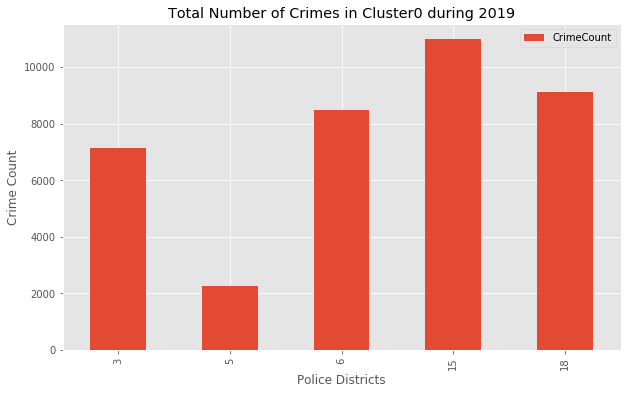

In [91]:
#Draw a bar chart that gives the crime number for the districts in cluster 0
phillyCrime_cluster0.plot(kind='bar', figsize=(10, 6))

plt.xlabel('Police Districts') # add to x-label to the plot
plt.ylabel('Crime Count') # add y-label to the plot
plt.title('Total Number of Crimes in Cluster0 during 2019') # add title to the plot

plt.show()

In [92]:
#create a data frame for cluster 2 from the merged data frame that contains venues and crime counts.
philly_cluster2=philly_merged.loc[philly_merged['Cluster Labels'] == 2, philly_merged.columns[[4]+[0] + [1]+list(range(5, philly_merged.shape[1]))]]

In [95]:
#philly_cluster2.set_index('district',inplace=True)
philly_cluster2

,Cluster Labels,CrimeCount,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
district,,,,,,,,,,,,
1,2,2560,Baseball Field,Arcade,Hookah Bar,Grocery Store,Bar,Ethiopian Restaurant,Flea Market,Fish Market,Film Studio,Fast Food Restaurant
2,2,6611,Men's Store,Shopping Mall,Clothing Store,Mobile Phone Shop,Optical Shop,Shoe Store,Sandwich Place,Pharmacy,Deli / Bodega,Paper / Office Supplies Store
8,2,4312,Convenience Store,Motel,Fish Market,Hotel,Rental Car Location,Italian Restaurant,Fast Food Restaurant,Gym Pool,Donut Shop,Border Crossing
9,2,7799,Hotel,Coffee Shop,Convenience Store,Sandwich Place,American Restaurant,Burger Joint,Public Art,Salad Place,Steakhouse,Donut Shop
12,2,8369,Diner,Deli / Bodega,Arts & Crafts Store,Indian Restaurant,Flea Market,Park,Breakfast Spot,Brewery,Mexican Restaurant,Middle Eastern Restaurant
14,2,8626,Bank,Shopping Plaza,Chinese Restaurant,Supermarket,Sandwich Place,Residential Building (Apartment / Condo),Shopping Mall,Optical Shop,Gym,Home Service
16,2,6765,Pizza Place,Deli / Bodega,Trail,New American Restaurant,Food Truck,Fried Chicken Joint,Chinese Restaurant,Tennis Stadium,Donut Shop,Coffee Shop
17,2,4650,Pizza Place,Bakery,Mexican Restaurant,Café,Beer Garden,Gastropub,Italian Restaurant,Coffee Shop,Southern / Soul Food Restaurant,Sushi Restaurant
19,2,10745,Pizza Place,American Restaurant,Sandwich Place,Residential Building (Apartment / Condo),Mexican Restaurant,Pharmacy,Steakhouse,Big Box Store,Sushi Restaurant,Mobile Phone Shop


In [96]:
#crate a data frame that contains only crime count info and district number in cluster 2
phillyCrime_cluster2=philly_cluster2[['CrimeCount']]

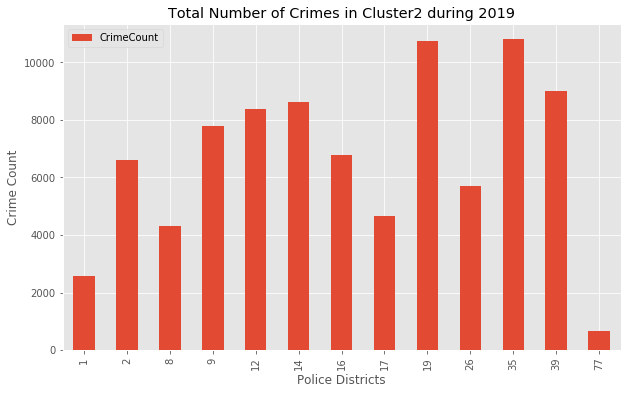

In [97]:
#Plot a bar chart for crime numbers for the districts in cluster 2
phillyCrime_cluster2.plot(kind='bar', figsize=(10, 6))

plt.xlabel('Police Districts') # add to x-label to the plot
plt.ylabel('Crime Count') # add y-label to the plot
plt.title('Total Number of Crimes in Cluster2 during 2019') # add title to the plot

plt.show()

Add clusters to the choloropleth map for crime counts.

In [98]:
# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(philly_merged['Latitude'], philly_merged['Longitude'], philly_merged['district'], philly_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_philly)
    

In [99]:
map_philly